### 수원시내 대학교 찾기

In [1]:
import requests
from urllib.parse import quote
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 카카오 인증키 불러오기
with open('../data/kakaoapikey.txt') as f:
    kakao_key = f.read()

In [3]:
# url list
addr_list = ['아주대학교', '동남보건대학', '수원 경기대학교', '수원 성균관대학교', '수원여자대학교', '용인 경희대학교']
base_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url_list = []

for addr in addr_list:
    temp = f'{base_url}?query={quote(addr)}'
    url_list.append(temp)
url_list

['https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%95%84%EC%A3%BC%EB%8C%80%ED%95%99%EA%B5%90',
 'https://dapi.kakao.com/v2/local/search/keyword.json?query=%EB%8F%99%EB%82%A8%EB%B3%B4%EA%B1%B4%EB%8C%80%ED%95%99',
 'https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%88%98%EC%9B%90%20%EA%B2%BD%EA%B8%B0%EB%8C%80%ED%95%99%EA%B5%90',
 'https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%88%98%EC%9B%90%20%EC%84%B1%EA%B7%A0%EA%B4%80%EB%8C%80%ED%95%99%EA%B5%90',
 'https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%88%98%EC%9B%90%EC%97%AC%EC%9E%90%EB%8C%80%ED%95%99%EA%B5%90',
 'https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%9A%A9%EC%9D%B8%20%EA%B2%BD%ED%9D%AC%EB%8C%80%ED%95%99%EA%B5%90']

In [4]:
# result list
header = {"Authorization": f'KakaoAK {kakao_key}'}

result_list = []
for url in url_list:
    result_list.append(requests.get(url, headers=header).json())
result_list[0]

{'documents': [{'address_name': '경기 수원시 영통구 원천동 산 5-1',
   'category_group_code': 'SC4',
   'category_group_name': '학교',
   'category_name': '교육,학문 > 학교 > 대학교',
   'distance': '',
   'id': '9894681',
   'phone': '031-219-2114',
   'place_name': '아주대학교',
   'place_url': 'http://place.map.kakao.com/9894681',
   'road_address_name': '경기 수원시 영통구 월드컵로 206',
   'x': '127.04355285631813',
   'y': '37.28295793156606'},
  {'address_name': '경기 수원시 영통구 원천동 산 26-6',
   'category_group_code': 'HP8',
   'category_group_name': '병원',
   'category_name': '의료,건강 > 병원 > 대학병원',
   'distance': '',
   'id': '10063656',
   'phone': '1688-6114',
   'place_name': '아주대학교병원',
   'place_url': 'http://place.map.kakao.com/10063656',
   'road_address_name': '경기 수원시 영통구 월드컵로 164',
   'x': '127.04753911133689',
   'y': '37.27944594804333'},
  {'address_name': '경기 수원시 영통구 원천동 산 5-1',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 장례 > 장례식장',
   'distance': '',
   'id': '1757891

In [5]:
# information in result
univ_addr = []
lat = []
lon = []
for result in result_list:
    univ_addr.append(result['documents'][0]['road_address_name'])
    lat.append(float(result['documents'][0]['y'])),
    lon.append(float(result['documents'][0]['x']))
    
df = pd.DataFrame({
        '대학교명' : addr_list,
        '주소' : univ_addr,
        '위도' : lat,
        '경도' : lon
    })
df['color'] = ['red', 'green', 'blue', 'orange', 'black', 'purple']
df

,대학교명,주소,위도,경도,color
0,아주대학교,경기 수원시 영통구 월드컵로 206,37.282958,127.043553,red
1,동남보건대학,경기 수원시 장안구 천천로74번길 50,37.297891,126.987917,green
2,수원 경기대학교,경기 수원시 영통구 광교산로 154-42,37.301149,127.035141,blue
3,수원 성균관대학교,경기 수원시 장안구 서부로 2066,37.295041,126.977421,orange
4,수원여자대학교,경기 수원시 권선구 온정로 72,37.252449,126.964026,black
5,용인 경희대학교,경기 용인시 기흥구 덕영대로 1732,37.242910,127.081190,purple



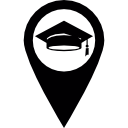
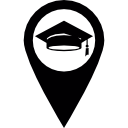
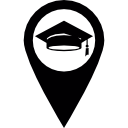
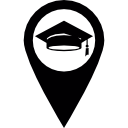
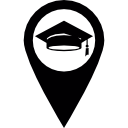
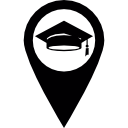

In [12]:
map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=13)

for i in df.index:
    icon = folium.CustomIcon('../data/university.png', icon_size=(60, 60))      # Cusotm icon 만드는법
    folium.Marker(
    location=[df.위도[i],df.경도[i]],          
    popup=folium.Popup(df.주소[i], max_width=200),
    icon=icon,
    tooltip=df.대학교명[i]
    ).add_to(map)

title_html = "<h3 align='center' style='font-size:20px'>수원 소재 대학교</h3>"
map.get_root().html.add_child(folium.Element(title_html))
map